<a href="https://colab.research.google.com/github/Iqrajahan/Music_Genre_Classification_Using_Transformer_Model/blob/main/MusicAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MUSIC SIGNAL ANALYSIS

**Importing the Required Libraries**

**NumPy**: is used for numerical computations

**Pandas**: is used for data manipulation and analysis, especially for DataFrames

**Matplotlib.pyplot**: Matplotlib is used for data visualisation

**Seaborn**: Seaborn is also a visualisation library and is built on top of Matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

**Librosa**: A library for analyzing and processing audio and music. It offers tools for audio analysis, feature extraction, and visualization.

**Sklearn**: Scikit-learn is a machine learning library that provides simple and efficient tools for data mining and data analysis.

**IPython.display**: This module is used for displaying rich media (like audio) in Jupyter Notebooks.

**sns.set(style='whitegrid')**:

 This line sets the aesthetic style of the plots to "whitegrid," which adds a white background with gridlines to help visualize data points clearly.

**%matplotlib inline:**

 This IPython magic command ensures that any plots generated by Matplotlib will be displayed inline within the Jupyter Notebook, rather than in a separate window. This is useful for interactive data analysis and visualization directly in the notebook.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import sklearn
import IPython.display as ipd

# Set the style using seaborn
sns.set(style='whitegrid')

# Make sure inline plotting works in Jupyter Notebook
%matplotlib inline

In [ ]:
# Define a lambda function to format floating-point numbers
float_formatter = lambda x: "%.4f" % x  # Format the number to four decimal places

# Set NumPy's print options to use the custom float formatter for displaying arrays
numpy.set_printoptions(formatter={'float_kind': float_formatter})  # Apply the formatter to float types

* Let's take two songs from GTZAN dataset as arrays of samples.
* Sampling rate is 22050 Hz.
* We take 5 seconds slices from songs.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sampling_rate=22050

x_metal,sr=librosa.load("/content/drive/MyDrive/Iqra Resumes/Resources/metal.00001.wav",sr=sampling_rate,mono=True,duration=5.0)
x_classical,sr=librosa.load("/content/drive/MyDrive/Iqra Resumes/Resources/classical.00001.wav",sr=sampling_rate,mono=True,duration=5.0)

In [ ]:
print("Overview of the array of samples for Metal song:(size={})\n{}:\n ".format(x_metal.shape,x_metal))
print("Overview of the array of samples for Classical song:(size={})\n{}".format(x_classical.shape,x_classical))

Overview of the array of samples for Metal song:(size=(110250,))
[0.1165 0.1194 0.1234 ... -0.1172 -0.0706 0.0141]:
 
Overview of the array of samples for Classical song:(size=(110250,))
[-0.0114 -0.0022 0.0169 ... 0.0383 0.0365 0.0305]


* We got 110250 samples with 22.05 KHz sampling rate.
* We got an array of samples for each song
* Every member of the array is a sample from signal.

* Let's plot the waveplots for each song.

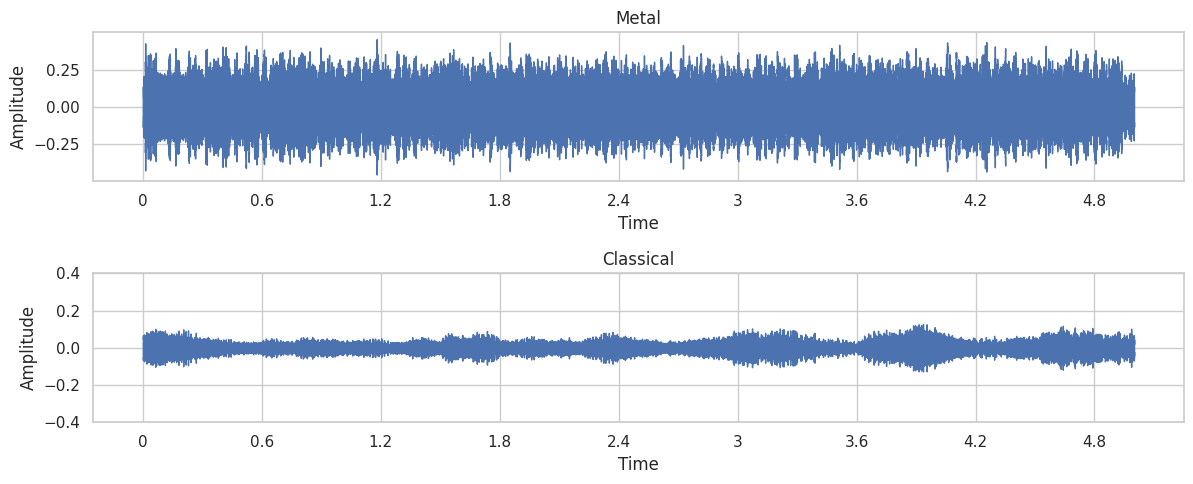

In [ ]:
# Waveplot - Time Domain
import librosa.display

fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(hspace=.5)

# Waveplot for Metal
plt.subplot(2, 1, 1)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
librosa.display.waveshow(x_metal, sr=sampling_rate)  # Updated to waveshow
plt.title('Metal')

# Waveplot for Classical
plt.subplot(2, 1, 2)
plt.ylim(-0.4, 0.4)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
librosa.display.waveshow(x_classical, sr=sampling_rate)  # Updated to waveshow
plt.title('Classical')

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


* Let's play the songs.

In [ ]:
ipd.Audio(x_metal, rate=sampling_rate)


In [ ]:
ipd.Audio(x_classical, rate=sampling_rate)

* We can see some differences between two waveplots.
* With waveplots, we only have Amplitude and time information.
* We can't learn so much from only waveplots.

**_SOLUTION ?_**
 - Fourier Tranform ( We wil see it in this notebook).

* **It's not a good way to analyze a complete song in time.**
* In audio processing, it is common to operate on one frame at a time using a constant frame size and hop size. Frames are typically chosen to be 10 to 100 ms in duration.
* We compute features from frames.

* **_Some Terms:_**
 - Frame Length: The number of samples in a frame.
 - Hop Length: The length between frames. (in samples)

* We use 2048 frame length and 512 hop length for this work.
* Also these values are the deafults for Librosa.

In [ ]:
hop_size=512
frame_size=2048

In [ ]:
#Segmentation
F=librosa.util.frame(x_metal,frame_length=frame_size,hop_length=hop_size)
x,y=F.shape

print("Number of frames={} with frame size={} for Metal song".format(y,x))
print("Total number of samples= {}\n".format(y*x+hop_size))
print(F)

F2=librosa.util.frame(x_classical,frame_length=frame_size,hop_length=hop_size)
x2,y2=F2.shape

print("\nNumber of frames={} with frame size={} for Classical song".format(y2,x2))
print("Total number of samples= {}\n".format(y2*x2+hop_size))
print(F2)

Number of frames=212 with frame size=2048 for Metal song
Total number of samples= 434688

[[0.1165 -0.0085 0.0128 ... 0.0222 -0.0954 -0.1196]
 [0.1194 -0.1501 0.0197 ... 0.0774 -0.1232 -0.1897]
 [0.1234 -0.1673 0.0392 ... -0.0791 -0.1354 -0.1052]
 ...
 [-0.1609 0.0424 0.0199 ... 0.0194 0.0811 -0.1163]
 [-0.1255 -0.0146 -0.0022 ... 0.0550 0.1528 -0.0857]
 [-0.1257 -0.1062 -0.0261 ... 0.0807 0.0930 -0.0690]]

Number of frames=212 with frame size=2048 for Classical song
Total number of samples= 434688

[[-0.0114 0.0450 -0.0739 ... 0.0551 0.0125 0.0472]
 [-0.0022 0.0277 -0.0708 ... 0.0639 0.0123 0.0596]
 [0.0169 0.0244 -0.0596 ... 0.0657 0.0210 0.0660]
 ...
 [0.0280 -0.0388 -0.0469 ... 0.0104 -0.0251 -0.0146]
 [0.0168 -0.0306 -0.0450 ... 0.0028 -0.0121 -0.0061]
 [0.0062 -0.0214 -0.0383 ... -0.0015 -0.0075 -0.0044]]


* How can we do a segmentation in other way ?
* If we can find the most valuable points in a signal and do segmentation after that points we can have valuable information with less frames.
** ONSET DETECTION **
* Automatic detection of musical events in an audio signal is one of the most fundamental tasks in music information retrieval. Here, we will show how to detect an onset, the very instant that marks the beginning of the transient part of a sound, or the earliest moment at which a transient can be reliably detected.

In [ ]:
# Onset Detection for Metal
onset_frames = librosa.onset.onset_detect(y=x_metal, sr=sampling_rate, hop_length=hop_size)
onset_times = librosa.frames_to_time(onset_frames, sr=sampling_rate)  # Added sr for clarity
num_onsets_metal = onset_frames.size
print("Number of detected onsets for Metal song: {}".format(num_onsets_metal))
print("Onset frames for Metal song:", onset_frames)

# Onset Detection for Classical
onset_frames2 = librosa.onset.onset_detect(y=x_classical, sr=sampling_rate, hop_length=hop_size)
onset_times2 = librosa.frames_to_time(onset_frames2, sr=sampling_rate)  # Added sr for clarity
num_onsets_classical = onset_frames2.size
print("\nNumber of detected onsets for Classical song: {}".format(num_onsets_classical))
print("Onset frames for Classical song:", onset_frames2)


Number of detected onsets for Metal song: 32
Onset frames for Metal song: [  3   7  11  19  28  35  44  48  51  60  68  77  84  93  98 101 118 127
 131 135 144 151 156 163 168 176 180 184 193 196 201 205]

Number of detected onsets for Classical song: 24
Onset frames for Classical song: [  3   5  18  26  46  50  56  69  80  83  91 106 113 122 128 134 146 157
 166 168 180 190 200 211]


* Let plot waveplot with detected onsets.

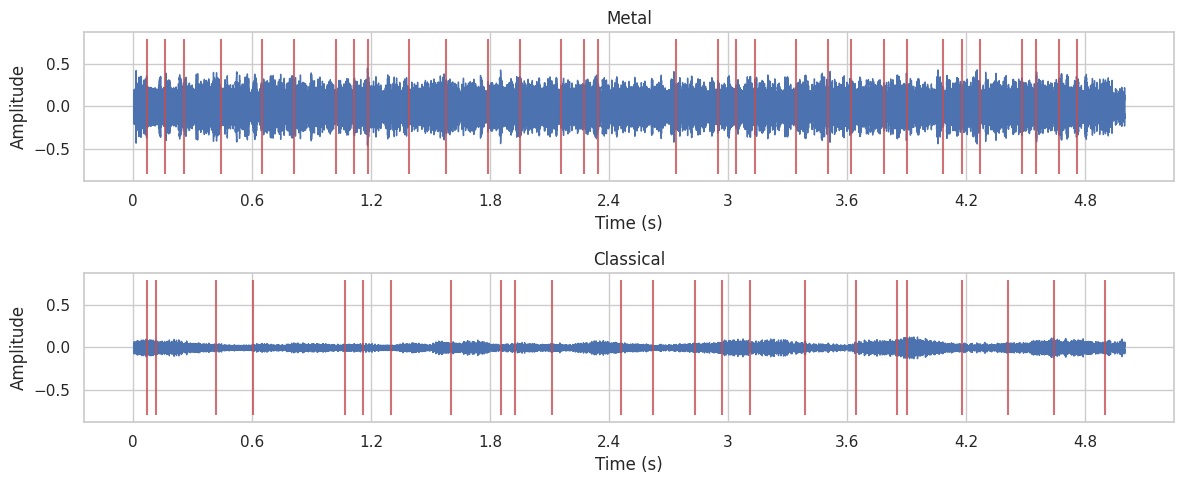

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# Create a figure
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

# Plot for Metal
plt.subplot(2, 1, 1)
librosa.display.waveshow(x_metal, sr=sampling_rate)  # Use waveshow for the updated version
plt.vlines(onset_times, -0.8, 0.79, color='r', alpha=0.8)  # Onset lines in red
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Metal')

# Plot for Classical
plt.subplot(2, 1, 2)
librosa.display.waveshow(x_classical, sr=sampling_rate)  # Use waveshow for the updated version
plt.vlines(onset_times2, -0.8, 0.79, color='r', alpha=0.8)  # Onset lines in red
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Classical')

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


* Let's create a click sound and add this sound to each onset on signal

In [ ]:
clicks = librosa.clicks(frames=onset_frames, sr=sampling_rate, length=len(x_metal))
ipd.Audio(x_metal + clicks, rate=sampling_rate)

In [ ]:
clicks = librosa.clicks(frames=onset_frames2, sr=sampling_rate, length=len(x_classical))
ipd.Audio(x_classical + clicks, rate=sampling_rate)

* **Fourier Transform**
* The Fourier Transform is one of the most fundamental operations in applied mathematics and signal processing.
* It transforms our time-domain signal into the frequency domain. Whereas the time domain expresses our signal as a sequence of samples, the frequency domain expresses our signal as a superposition of sinusoids of varying magnitudes, frequencies, and phase offsets.



* Let's compute FFTs for each song and plot Spectrums.

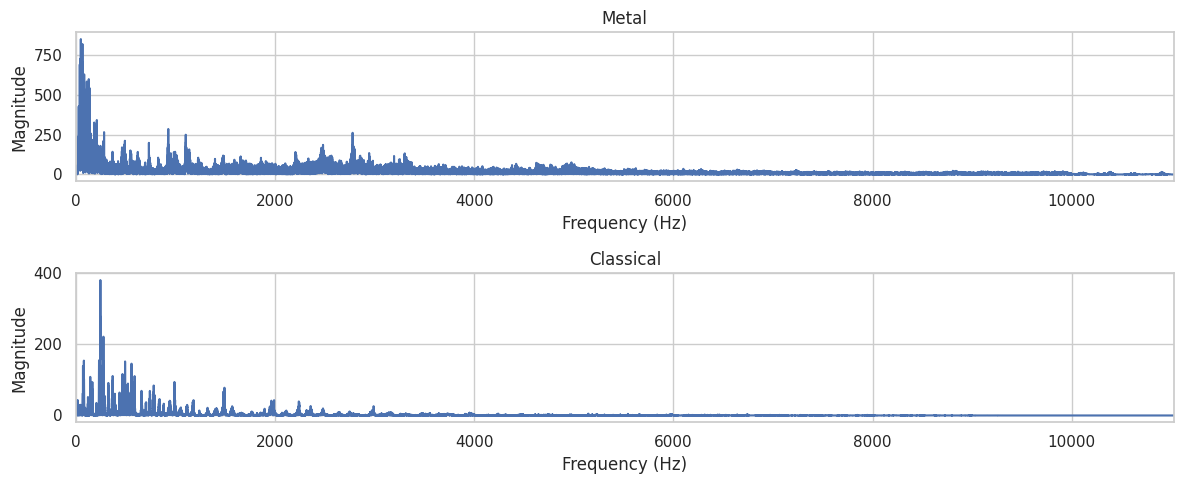

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft

# Calculate the Fourier Transform
FFT_Metal = scipy.fft.fft(x_metal)
FFT_Classical = scipy.fft.fft(x_classical)

# Get the magnitude of the FFT
FFT_Metal_Mag = np.absolute(FFT_Metal)
FFT_Classical_Mag = np.absolute(FFT_Classical)

# Get the corresponding frequency bins
sampling_points = len(x_metal)  # Number of samples in the signal
frequencies = np.fft.fftfreq(sampling_points, d=1/sampling_rate)  # Frequency bins

# Create a figure for the plots
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

# Plot for Metal
plt.subplot(2, 1, 1)
plt.plot(frequencies[:sampling_points // 2], FFT_Metal_Mag[:sampling_points // 2])  # Only plot the positive frequencies
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title('Metal')
plt.xlim(0, sampling_rate / 2)  # Limit x-axis to Nyquist frequency

# Plot for Classical
plt.subplot(2, 1, 2)
plt.plot(frequencies[:sampling_points // 2], FFT_Classical_Mag[:sampling_points // 2])  # Only plot the positive frequencies
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title('Classical')
plt.xlim(0, sampling_rate / 2)  # Limit x-axis to Nyquist frequency

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


* We have frequency information of signals.
* But we lost information about time.
* How can we get information about time and frequency at the same time ?
* **Short-Time Fourier Transform**
 - Musical signals are highly non-stationary, i.e., their statistics change over time. It would be rather meaningless to compute a spectrum over an entire 10-minute song.
 - With STFT, we break up the signal into dicsrete windows.
 - We use a window fucntion such as Polynomial, Hanning, Hamming...
 - Each signal within a window is a stationary signal.
 - After we apply FFT over each window we obtain Spectogram of the signal.
 - **_Window Size_:** Number of samples in each window.

Let's compute STFSs for each song and plot Spectograms.

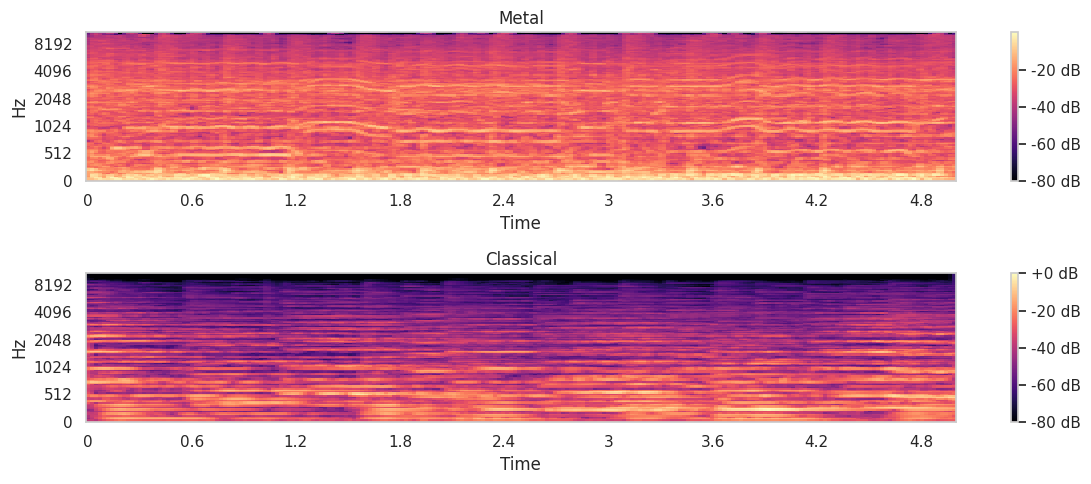

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define window size
window_size = 2048

# Create a figure for the plots
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

# Mel Spectrogram for Metal
plt.subplot(2, 1, 1)
S = librosa.feature.melspectrogram(y=x_metal, sr=sampling_rate, n_fft=window_size)  # Use y= for input
logS = librosa.power_to_db(S, ref=np.max)  # Convert to dB
plt.title('Metal')
librosa.display.specshow(logS, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

# Mel Spectrogram for Classical
plt.subplot(2, 1, 2)
S2 = librosa.feature.melspectrogram(y=x_classical, sr=sampling_rate, n_fft=window_size)  # Use y= for input
logS2 = librosa.power_to_db(S2, ref=np.max)  # Convert to dB
plt.title('Classical')
librosa.display.specshow(logS2, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


* Let's add the onsets that we detected before to Spectograms.

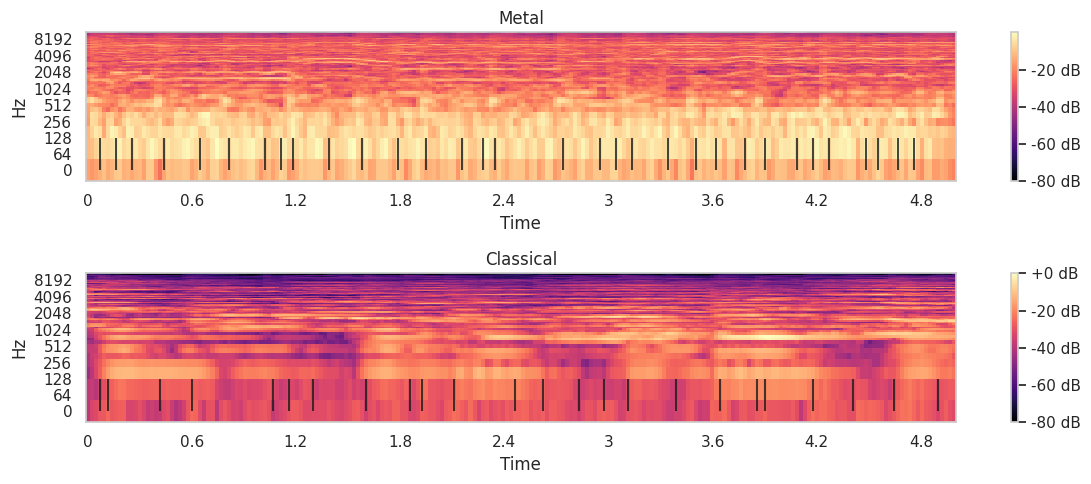

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Create a figure for the plots
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

# Mel Spectrogram for Metal
plt.subplot(2, 1, 1)
S = librosa.feature.melspectrogram(y=x_metal, sr=sampling_rate, n_fft=window_size)
logS = librosa.power_to_db(S, ref=np.max)  # Convert to dB
plt.title('Metal')
librosa.display.specshow(logS, sr=sampling_rate, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, logS.shape[0], color='k', alpha=0.8)  # Use onset_times
plt.colorbar(format='%+2.0f dB')

# Mel Spectrogram for Classical
plt.subplot(2, 1, 2)
S2 = librosa.feature.melspectrogram(y=x_classical, sr=sampling_rate, n_fft=window_size)
logS2 = librosa.power_to_db(S2, ref=np.max)  # Convert to dB
plt.title('Classical')
librosa.display.specshow(logS2, sr=sampling_rate, x_axis='time', y_axis='log')
plt.vlines(onset_times2, 0, logS2.shape[0], color='k', alpha=0.8)  # Use onset_times2
plt.colorbar(format='%+2.0f dB')

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()



* **Constant-Q Transform**
 - If we want to obtain information about pitch values we use Constant-Q Transform.

Let's apply Constant-Q Transform and obtain Chromagram for each song.

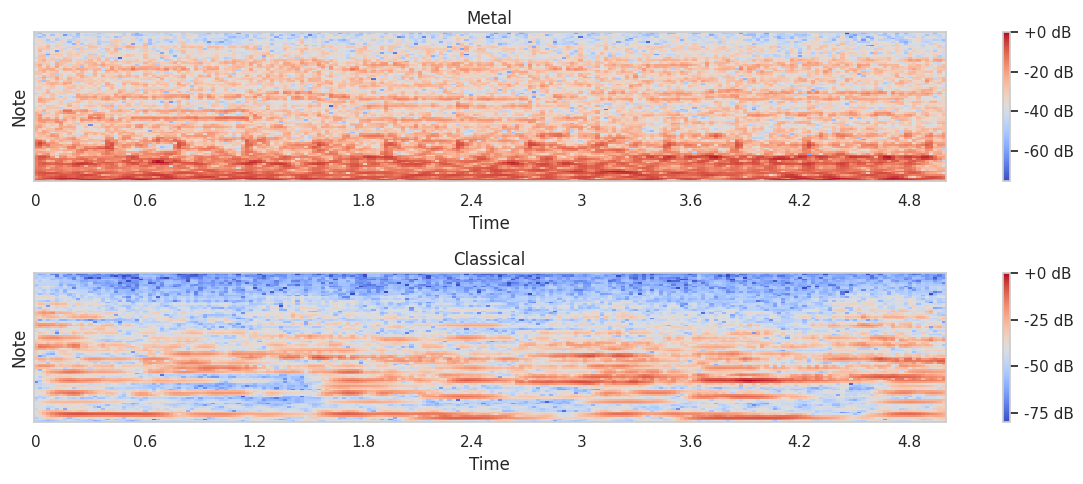

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Create a figure for the plots
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

# CQT for Metal
plt.subplot(2, 1, 1)
C = librosa.cqt(y=x_metal, sr=sampling_rate, hop_length=hop_size, fmin=librosa.note_to_hz('C2'))
logC = librosa.amplitude_to_db(np.abs(C), ref=np.max)  # Convert to dB
plt.title('Metal')
librosa.display.specshow(logC, sr=sampling_rate, x_axis='time', y_axis='cqt_note', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

# CQT for Classical
plt.subplot(2, 1, 2)
C2 = librosa.cqt(y=x_classical, sr=sampling_rate, hop_length=hop_size, fmin=librosa.note_to_hz('C2'))
logC2 = librosa.amplitude_to_db(np.abs(C2), ref=np.max)  # Convert to dB
plt.title('Classical')
librosa.display.specshow(logC2, sr=sampling_rate, x_axis='time', y_axis='cqt_note', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


* Let's do the same thing with pitch classes.

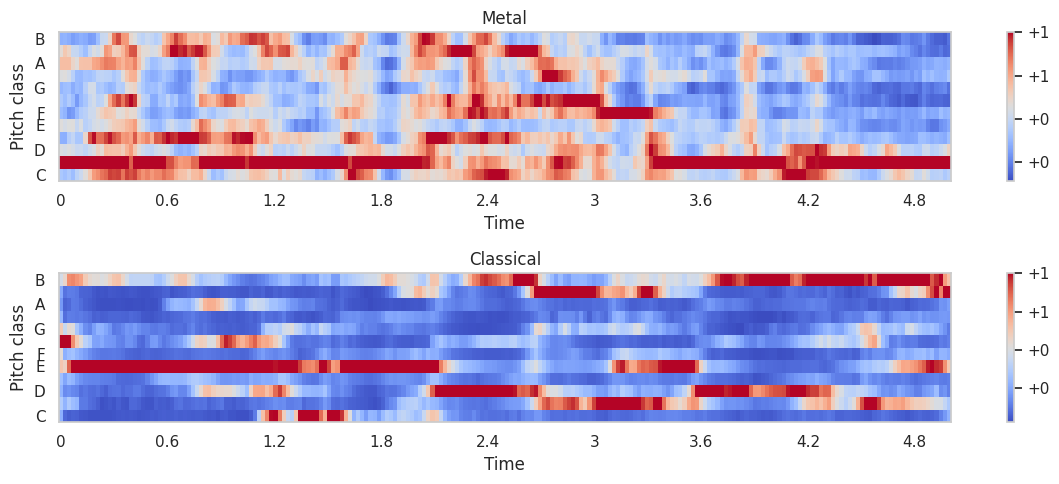

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Create a figure for the plots
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

# Chromagram for Metal
plt.subplot(2, 1, 1)
C = librosa.feature.chroma_cqt(y=x_metal, sr=sampling_rate, hop_length=hop_size, fmin=librosa.note_to_hz('C2'))
plt.title('Metal')
librosa.display.specshow(C, sr=sampling_rate, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar(format='%+2.0f')  # Removed dB format since chroma does not use dB scale

# Chromagram for Classical
plt.subplot(2, 1, 2)
C2 = librosa.feature.chroma_cqt(y=x_classical, sr=sampling_rate, hop_length=hop_size, fmin=librosa.note_to_hz('C2'))
plt.title('Classical')
librosa.display.specshow(C2, sr=sampling_rate, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar(format='%+2.0f')  # Same as above

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()
